In [1]:
import os
import glob

import gdown
from rdkit import Chem
from rdkit.Chem import PandasTools
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import networkx as nx
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

from intuitive_sc.utils.paths import DATA_PATH

In [2]:
from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

## USPTO

### Load USPTO from Graph2SMILES

In [3]:
urls_fns_dict = {
    "USPTO_50k": [
        ("https://drive.google.com/uc?id=1pz-qkfeXzeD_drO9XqZVGmZDSn20CEwr", "src-train.txt"),
        ("https://drive.google.com/uc?id=1ZmmCJ-9a0nHeQam300NG5i9GJ3k5lnUl", "tgt-train.txt"),
        ("https://drive.google.com/uc?id=1NqLI3xpy30kH5fbVC0l8bMsMxLKgO-5n", "src-val.txt"),
        ("https://drive.google.com/uc?id=19My9evSNc6dlk9od5OrwkWauBpzL_Qgy", "tgt-val.txt"),
        ("https://drive.google.com/uc?id=1l7jSqYfIr0sL5Ad6TUxsythqVFjFudIx", "src-test.txt"),
        ("https://drive.google.com/uc?id=17ozyajoqPFeVjfViI59-QpVid1M0zyKN", "tgt-test.txt")
    ],
    "USPTO_full": [
        ("https://drive.google.com/uc?id=1PbHoIYbm7-69yPOvRA0CrcjojGxVCJCj", "src-train.txt"),
        ("https://drive.google.com/uc?id=1RRveZmyXAxufTEix-WRjnfdSq81V9Ud9", "tgt-train.txt"),
        ("https://drive.google.com/uc?id=1jOIA-20zFhQ-x9fco1H7Q10R6CfxYeZo", "src-val.txt"),
        ("https://drive.google.com/uc?id=19ZNyw7hLJaoyEPot5ntKBxz_o-_R14QP", "tgt-val.txt"),
        ("https://drive.google.com/uc?id=1ErtNB29cpSld8o_gr84mKYs51eRat0H9", "src-test.txt"),
        ("https://drive.google.com/uc?id=1kV9p1_KJm8EqK6OejSOcqRsO8DwOgjL_", "tgt-test.txt")
    ],
    "USPTO_480k": [
        ("https://drive.google.com/uc?id=1RysNBvB2rsMP0Ap9XXi02XiiZkEXCrA8", "src-train.txt"),
        ("https://drive.google.com/uc?id=1CxxcVqtmOmHE2nhmqPFA6bilavzpcIlb", "tgt-train.txt"),
        ("https://drive.google.com/uc?id=1FFN1nz2yB4VwrpWaBuiBDzFzdX3ONBsy", "src-val.txt"),
        ("https://drive.google.com/uc?id=1pYCjWkYvgp1ZQ78EKQBArOvt_2P1KnmI", "tgt-val.txt"),
        ("https://drive.google.com/uc?id=10t6pHj9yR8Tp3kDvG0KMHl7Bt_TUbQ8W", "src-test.txt"),
        ("https://drive.google.com/uc?id=1FeGuiGuz0chVBRgePMu0pGJA4FVReA-b", "tgt-test.txt")
    ],
    "USPTO_STEREO": [
        ("https://drive.google.com/uc?id=1r3_7WMEor7-CgN34Foj-ET-uFco0fURU", "src-train.txt"),
        ("https://drive.google.com/uc?id=1HUBLDtqEQc6MQ-FZQqNhh2YBtdc63xdG", "tgt-train.txt"),
        ("https://drive.google.com/uc?id=1WwCH8ASgBM1yOmZe0cJ46bj6kPSYYIRc", "src-val.txt"),
        ("https://drive.google.com/uc?id=19OsSpXxWJ-XWuDwfG04VTYzcKAJ28MTw", "tgt-val.txt"),
        ("https://drive.google.com/uc?id=1FcbWZnyixhptaO6DIVjCjm_CeTomiCQJ", "src-test.txt"),
        ("https://drive.google.com/uc?id=1rVWvbmoVC90jyGml_t-r3NhaoWVVSKLe", "tgt-test.txt")
    ]
}

In [4]:
dataset_name = 'USPTO_full'

In [5]:
for url, fn in urls_fns_dict[dataset_name]:
        os.makedirs(os.path.join(DATA_PATH, 'raw_uspto', dataset_name), exist_ok=True)
        ofn = os.path.join(DATA_PATH, 'raw_uspto', dataset_name, fn)
        if not os.path.exists(ofn):
            gdown.download(url, ofn, quiet=False)
            assert os.path.exists(ofn)
        else:
            print(f"{ofn} exists, skip downloading")

Downloading...
From: https://drive.google.com/uc?id=1PbHoIYbm7-69yPOvRA0CrcjojGxVCJCj
To: /Users/neeser/code/intuitive-sc/data/raw_uspto/USPTO_full/src-train.txt
100%|██████████| 68.3M/68.3M [00:05<00:00, 12.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RRveZmyXAxufTEix-WRjnfdSq81V9Ud9
To: /Users/neeser/code/intuitive-sc/data/raw_uspto/USPTO_full/tgt-train.txt
100%|██████████| 77.3M/77.3M [00:06<00:00, 12.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jOIA-20zFhQ-x9fco1H7Q10R6CfxYeZo
To: /Users/neeser/code/intuitive-sc/data/raw_uspto/USPTO_full/src-val.txt
100%|██████████| 8.54M/8.54M [00:00<00:00, 13.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=19ZNyw7hLJaoyEPot5ntKBxz_o-_R14QP
To: /Users/neeser/code/intuitive-sc/data/raw_uspto/USPTO_full/tgt-val.txt
100%|██████████| 9.66M/9.66M [00:00<00:00, 13.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ErtNB29cpSld8o_gr84mKYs51eRat0H9
To: /Users/neeser/code/intuitive-sc/data/raw_uspto/USPTO_f

In [27]:
raw_filepaths = glob.glob(os.path.join(DATA_PATH, 'raw_uspto', dataset_name, '*.txt'))
uspto_data_prod = []
uspto_data_react = []
for filepath in raw_filepaths:
    if 'train' in filepath:
        split = 'train'
    elif 'val' in filepath:
        split = 'val'
    elif 'test' in filepath:
        split = 'test'
    if 'src' in filepath:
        moltype = 'product'
        with open(filepath, "r") as f:
            lines = f.readlines()
        # remove spaces between characters
        lines = [''.join(line.strip().split()) for line in lines]
        sub_df = pd.DataFrame(lines, columns=[moltype])
        sub_df['split'] = split
        uspto_data_prod.append(sub_df)
    elif 'tgt' in filepath:
        moltype = 'reactant'
        with open(filepath, "r") as f:
            lines = f.readlines()
        lines = [''.join(line.strip().split()) for line in lines]
        sub_df = pd.DataFrame(lines, columns=[moltype])
        sub_df['split'] = split
        uspto_data_react.append(sub_df)
    print(len(sub_df))
uspto_data_prod = pd.concat(uspto_data_prod)
uspto_data_react = pd.concat(uspto_data_react)

101311
810496
101311
101311
101311
810496


In [17]:
mols = []
n = 0
for smi in uspto_data_prod['product']:
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        n +=1
        print(smi)
    mols.append(mol)
print(n)

0


In [28]:
uspto_data_prod.head()

product split
0  CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=...  test
1  CNC(=O)c1c(-c2ccc(F)cc2)oc2ncc(-c3cccc(C(=O)NC...  test
2  C=COC(=O)N1CC(=O)C2=C(C1)NC1=C(C(=O)COC1)C2c1c...  test
3  COC(=O)[C@H](Cc1ccc(OCc2ccc3c(c2)OCCO3)cc1)NC1...  test
4           C/C(=N\OCc1ccc([N+](=O)[O-])cc1)c1ccccc1  test

In [29]:
len(uspto_data_prod), len(uspto_data_react)

(1013118, 1013118)

### Combine df

In [30]:
uspto_prod_train = uspto_data_prod[uspto_data_prod['split'] == 'train']
uspto_prod_val = uspto_data_prod[uspto_data_prod['split'] == 'val']
uspto_prod_test = uspto_data_prod[uspto_data_prod['split'] == 'test']
uspto_react_train = uspto_data_react[uspto_data_react['split'] == 'train']
uspto_react_val = uspto_data_react[uspto_data_react['split'] == 'val']
uspto_react_test = uspto_data_react[uspto_data_react['split'] == 'test']

In [31]:
# create combined df with matching train, test, val split column and matching index
uspto_train = pd.concat([uspto_react_train.drop(columns=['split']), uspto_prod_train], axis=1)
uspto_val = pd.concat([uspto_react_val.drop(columns=['split']), uspto_prod_val], axis=1)
uspto_test = pd.concat([uspto_react_test.drop(columns=['split']), uspto_prod_test], axis=1)
# combine train, test, val
uspto_data = pd.concat([uspto_train, uspto_val, uspto_test])
uspto_data.head()

reactant   
0  N#Cc1cc(Oc2ccc(B(O)O)cc2)ccc1C(F)(F)F.NC(=O)C(...  \
1                                                 CC   
2                                                 CC   
3                           CCCCC(CC)COS(=O)(=O)[O-]   
4  CCOC(=O)CN1C(=O)C(N)N=C(c2ccccc2)c2ccccc21.O=C...   

                                             product  split  
0  N#Cc1cc(Oc2ccc(-c3cccc(C(O)C(N)=O)n3)cc2)ccc1C...  train  
1                                CC1CNC(c2ccccc2)=N1  train  
2  O=C(O)c1ccc(C[P+](c2ccccc2)(c2ccccc2)c2ccccc2)...  train  
3                              CCCCC(CC)COS(=O)(=O)O  train  
4  CCOC(=O)CN1C(=O)C(NC(=O)Cc2ccc(Cl)cc2)N=C(c2cc...  train

In [32]:
len(uspto_data)

1013118

### Analyze

There are instances where there are two reactants and sometimes the reactant is just CC.

In [33]:
mols = []
n_max = 1000
for i, row in uspto_train.iterrows():
    mol_prod = Chem.MolFromSmiles(row['product'])
    mol_reac = Chem.MolFromSmiles(row['reactant'])
    mols.append(mol_reac)
    mols.append(mol_prod)
    if i > n_max:
        break

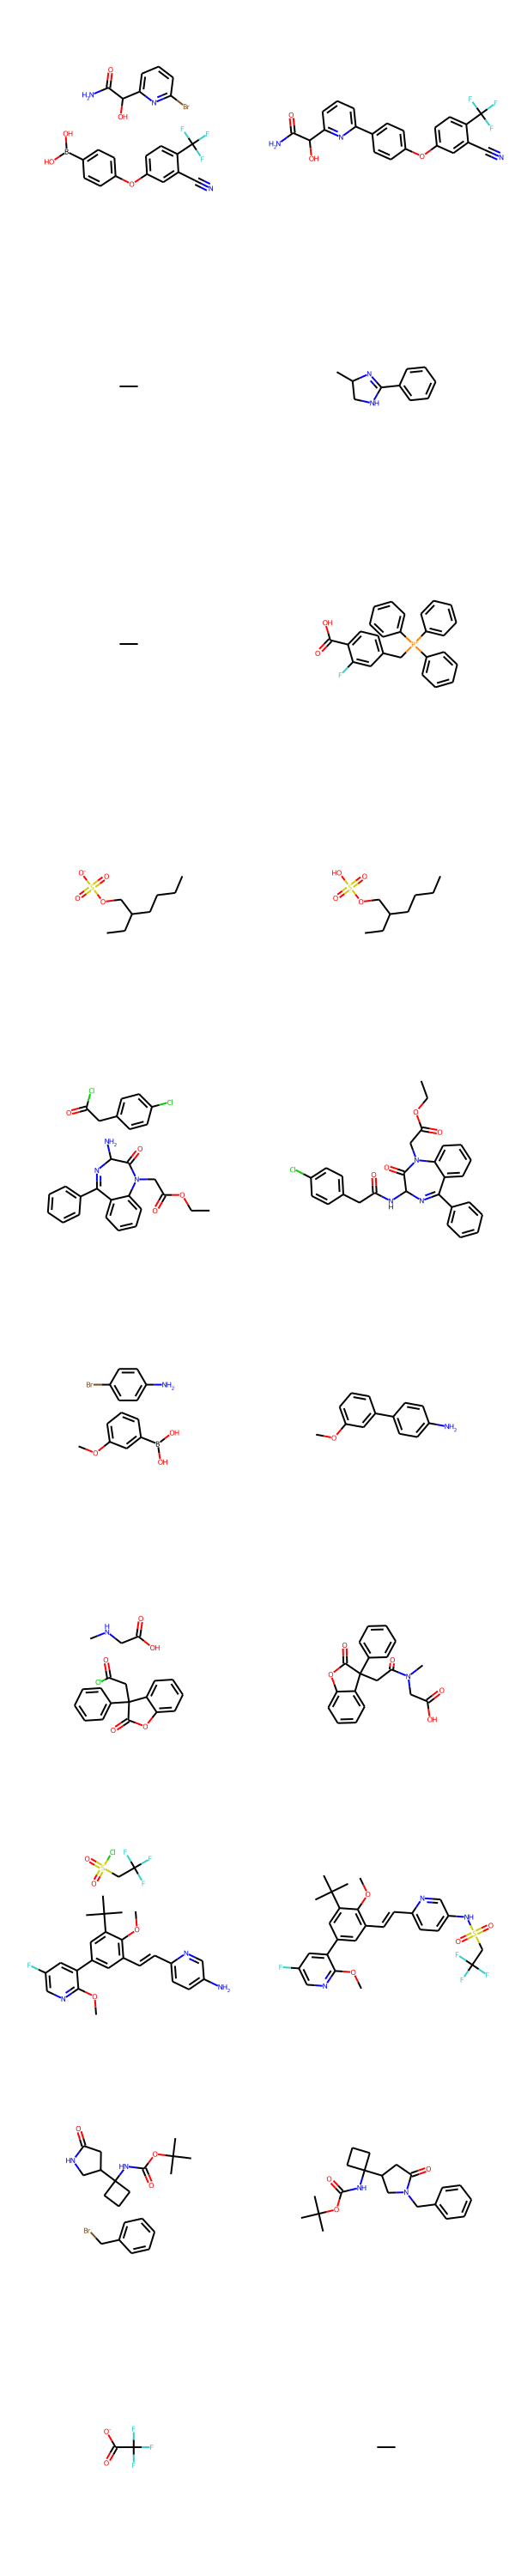

In [34]:
Chem.Draw.MolsToGridImage(mols[:20], molsPerRow=2, subImgSize=(300, 300))

In [35]:
print('all unfiltered reactions: ', len(uspto_data))    
# remove rows with nan values
uspto_data = uspto_data.dropna()
print('after removing nan values: ', len(uspto_data))
# remove rows with empty strings
uspto_data = uspto_data[uspto_data['reactant'] != '']
uspto_data = uspto_data[uspto_data['product'] != '']
print('after removing empty strings: ', len(uspto_data))
# remove rows with reactant and product that are the same
uspto_data = uspto_data[uspto_data['reactant'] != uspto_data['product']]
print('after removing reactant and product that are the same: ', len(uspto_data))
# remove duplicates
uspto_data.drop_duplicates(keep='first', inplace=True)
print('after removing duplicates: ', len(uspto_data))
uspto_data.reset_index(drop=True, inplace=True)

all unfiltered reactions:  1013118
after removing nan values:  1013118
after removing empty strings:  1013091
after removing reactant and product that are the same:  1004548
after removing duplicates:  977564


In [36]:
# split datapoints in two if there are two reactants (string has '.' in it)
uspto_data_split = []
for i, row in uspto_data.iterrows():
    if '.' in row['reactant']:
        reactants = row['reactant'].split('.')
        for reactant in reactants:
            sub_df = pd.DataFrame({'reactant': reactant, 'product': row['product']}, index=[i])
            uspto_data_split.append(sub_df)
    else:
        sub_df = pd.DataFrame({'reactant': row['reactant'], 'product': row['product']}, index=[i])
        uspto_data_split.append(sub_df)
uspto_data_split = pd.concat(uspto_data_split)
uspto_data_split.head()

reactant   
0  N#Cc1cc(Oc2ccc(B(O)O)cc2)ccc1C(F)(F)F  \
0                 NC(=O)C(O)c1cccc(Br)n1   
1                                     CC   
2                                     CC   
3               CCCCC(CC)COS(=O)(=O)[O-]   

                                             product  
0  N#Cc1cc(Oc2ccc(-c3cccc(C(O)C(N)=O)n3)cc2)ccc1C...  
0  N#Cc1cc(Oc2ccc(-c3cccc(C(O)C(N)=O)n3)cc2)ccc1C...  
1                                CC1CNC(c2ccccc2)=N1  
2  O=C(O)c1ccc(C[P+](c2ccccc2)(c2ccccc2)c2ccccc2)...  
3                              CCCCC(CC)COS(=O)(=O)O

In [37]:
# canonicalize smiles
print(len(uspto_data_split))
uspto_data_split.drop_duplicates(keep ='first', inplace=True)
print(len(uspto_data_split))
uspto_data_split['reactant'] = uspto_data_split['reactant'].apply(lambda x: Chem.CanonSmiles(x))
uspto_data_split['product'] = uspto_data_split['product'].apply(lambda x: Chem.CanonSmiles(x))

1784997
1743100


In [38]:
# repeat filtering with canonicalized smiles before split!
print('all unfiltered reactions: ', len(uspto_data_split))
# remove rows with nan values
uspto_data_split = uspto_data_split.dropna()
print('after removing nan values: ', len(uspto_data_split))
# remove rows with empty strings
uspto_data_split = uspto_data_split[uspto_data_split['reactant'] != '']
uspto_data_split = uspto_data_split[uspto_data_split['product'] != '']
print('after removing empty strings: ', len(uspto_data_split))
# remove rows with reactant and product that are the same
uspto_data_split = uspto_data_split[uspto_data_split['reactant'] != uspto_data_split['product']]
print('after removing reactant and product that are the same: ', len(uspto_data_split))
# remove duplicates
uspto_data_split.drop_duplicates(keep ='first', inplace=True)
print('after removing duplicates: ', len(uspto_data_split))
uspto_data_split.reset_index(drop=True, inplace=True)

all unfiltered reactions:  1743100
after removing nan values:  1743100
after removing empty strings:  1743100
after removing reactant and product that are the same:  1743089
after removing duplicates:  1742976


In [40]:
# check if there are datapoints with multiple products
uspto_data_split[uspto_data_split['product'].str.contains('.', regex=False)]

Empty DataFrame
Columns: [reactant, product]
Index: []

In [39]:
# save to csv
uspto_data.to_csv(os.path.join(DATA_PATH, 'raw_uspto', dataset_name, 'uspto_raw_combo.csv'))
uspto_data_split.to_csv(os.path.join(DATA_PATH, 'raw_uspto', dataset_name, 'uspto_raw_split_combo.csv'))

In [19]:
# load data
uspto_data = pd.read_csv(os.path.join(DATA_PATH, 'raw_uspto', dataset_name, 'uspto_raw_combo.csv'), index_col=0)
uspto_data_split = pd.read_csv(os.path.join(DATA_PATH, 'raw_uspto', dataset_name, 'uspto_raw_split_combo.csv'), index_col=0)

#### Analyse graph from reactions

In [41]:
# plot the graph using plotly
def plot_graph(graph, plot_title='Reaction Graph'):
    pos = nx.spring_layout(graph, k=0.5, iterations=50)
    edge_x = []
    edge_y = []
    for edge in graph.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.3, color='black'),
        hoverinfo='none',
        mode="lines",
        )

    node_x = []
    node_y = []
    for node in graph.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='YlGnBu',
            reversescale=True,
            color=[],
            size=10,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line_width=2))


    node_adjacencies = []
    node_text = []
    for node, adjacencies in enumerate(G.adjacency()):
        node_adjacencies.append(len(adjacencies[1]))
        node_text.append(adjacencies[0])

    node_trace.marker.color = node_adjacencies
    node_trace.text = node_text

    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title=plot_title,
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20, l=5, r=5, t=40),
                        annotations=[
                            dict(
                                text='',
                                ax=x1,
                                ay=y1,
                                axref='x',
                                ayref='y',
                                x=x0,
                                y=y0,
                                xref='x',
                                yref='y',
                                showarrow=True,
                                arrowhead=2,
                                arrowsize=1.5,
                                arrowwidth=1,
                                arrowcolor='grey',
                                standoff=6
                            )
                            for x0, y0, x1, y1 in zip(edge_x[:-2:3], edge_y[:-2:3], edge_x[1:-1:3], edge_y[1:-1:3])
                        ],
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
    
    fig.show()

In [42]:
# create a list of of (reactant, product) tuples
reac_prod = list(zip(uspto_data_split['reactant'], uspto_data_split['product']))

In [43]:
digraph = nx.DiGraph()
digraph.add_edges_from(reac_prod)

In [44]:
# get random rows from dataframe and extract reactant and product
n_max = 1000
subgraph_smiles = []
for i, row in uspto_data_split.sample(n_max).iterrows():
    subgraph_smiles.append(row['reactant'])
    subgraph_smiles.append(row['product'])
G = digraph.subgraph(subgraph_smiles)
plot_graph(G)

### Remove molecules with less than 4 heavy atoms

In [45]:
def filter_process(both_smiles):
    dropped = False
    reac_smi = both_smiles[0]
    prod_smi = both_smiles[1]
    reactant = Chem.MolFromSmiles(reac_smi)
    product = Chem.MolFromSmiles(prod_smi)
    if reactant is None or product is None:
        dropped = True
    elif reactant.GetNumHeavyAtoms() < 4 or product.GetNumHeavyAtoms() < 4:
        dropped = True
    # canonicalize smiles
    if not dropped:
        new_reac_smi = Chem.CanonSmiles(reac_smi)
        new_prod_smi = Chem.CanonSmiles(prod_smi)
        return (new_reac_smi, new_prod_smi)
    else:
        return (None, None)

In [46]:
import sys
sys.path.append('/Users/neeser/code/general_utils')
from parallel import chunked_parallel

# get list of tuples of reactant and product smiles
smiles_list = list(zip(uspto_data_split['reactant'].tolist(), uspto_data_split['product'].tolist()))

# filter smiles
smiles_list_filtered = chunked_parallel(smiles_list, filter_process)

101it [01:15,  1.33it/s]                        


In [47]:
# make df from filtered smiles
df_uspto_filtered = pd.DataFrame(smiles_list_filtered, columns=['reactant', 'product'])

In [48]:
print('all unfiltered reactions: ', len(df_uspto_filtered))    
# remove rows with nan values
df_uspto_filtered = df_uspto_filtered.dropna()
print('after removing nan values: ', len(df_uspto_filtered))
# remove rows with empty strings
df_uspto_filtered = df_uspto_filtered[df_uspto_filtered['reactant'] != '']
df_uspto_filtered = df_uspto_filtered[df_uspto_filtered['product'] != '']
print('after removing empty strings: ', len(df_uspto_filtered))
# remove rows with reactant and product that are the same
df_uspto_filtered = df_uspto_filtered[df_uspto_filtered['reactant'] != df_uspto_filtered['product']]
print('after removing reactant and product that are the same: ', len(df_uspto_filtered))
# remove duplicates
df_uspto_filtered = df_uspto_filtered.drop_duplicates(keep='first')
print('after removing duplicates: ', len(df_uspto_filtered))
df_uspto_filtered.reset_index(drop=True, inplace=True)

all unfiltered reactions:  1742976
after removing nan values:  1601225
after removing empty strings:  1601225
after removing reactant and product that are the same:  1601225
after removing duplicates:  1601225


### Remove unwanted elements

In [49]:
accepted_elems = ['Se',
 'B',
 'I',
 'P',
 'F',
 'H',
 'C',
 'Br',
 'N',
 'O',
 'S',
 'Si',
 'Cl']

In [50]:
def remove_unwanted_elems(both_smiles):
    reac_smi = both_smiles[0]
    prod_smi = both_smiles[1]
    reactant = Chem.MolFromSmiles(reac_smi)
    product = Chem.MolFromSmiles(prod_smi)
    if reactant is None or product is None:
        return (None, None)
    reactant_elements = [atom.GetSymbol() for atom in reactant.GetAtoms()]
    product_elements = [atom.GetSymbol() for atom in product.GetAtoms()]

    # drop if reactant or product contains elements not in accepted_elems
    if not set(reactant_elements).issubset(set(accepted_elems)) or not set(product_elements).issubset(set(accepted_elems)):
        return (None, None)
    else:
        return (reac_smi, prod_smi)

In [51]:
# get list of tuples of reactant and product smiles
smiles_list = list(zip(df_uspto_filtered['reactant'].tolist(), df_uspto_filtered['product'].tolist()))

# filter smiles
smiles_list_filtered = chunked_parallel(smiles_list, remove_unwanted_elems)

# make df from filtered smiles
df_uspto_filtered2 = pd.DataFrame(smiles_list_filtered, columns=['reactant', 'product'])

101it [02:48,  1.67s/it]                        


In [52]:
# drop rows with None
df_uspto_filtered2 = df_uspto_filtered2.dropna()
df_uspto_filtered2.head()

reactant   
0       N#Cc1cc(Oc2ccc(B(O)O)cc2)ccc1C(F)(F)F  \
1                      NC(=O)C(O)c1cccc(Br)n1   
2                    CCCCC(CC)COS(=O)(=O)[O-]   
3  CCOC(=O)CN1C(=O)C(N)N=C(c2ccccc2)c2ccccc21   
4                        O=C(Cl)Cc1ccc(Cl)cc1   

                                             product  
0  N#Cc1cc(Oc2ccc(-c3cccc(C(O)C(N)=O)n3)cc2)ccc1C...  
1  N#Cc1cc(Oc2ccc(-c3cccc(C(O)C(N)=O)n3)cc2)ccc1C...  
2                              CCCCC(CC)COS(=O)(=O)O  
3  CCOC(=O)CN1C(=O)C(NC(=O)Cc2ccc(Cl)cc2)N=C(c2cc...  
4  CCOC(=O)CN1C(=O)C(NC(=O)Cc2ccc(Cl)cc2)N=C(c2cc...

In [53]:
len(df_uspto_filtered2)

1585685

In [54]:
# save df
df_uspto_filtered2.to_csv(os.path.join(DATA_PATH, 'raw_uspto', dataset_name, 'uspto_split_combo_fil_withloops2.csv'))

### Prelim analysis

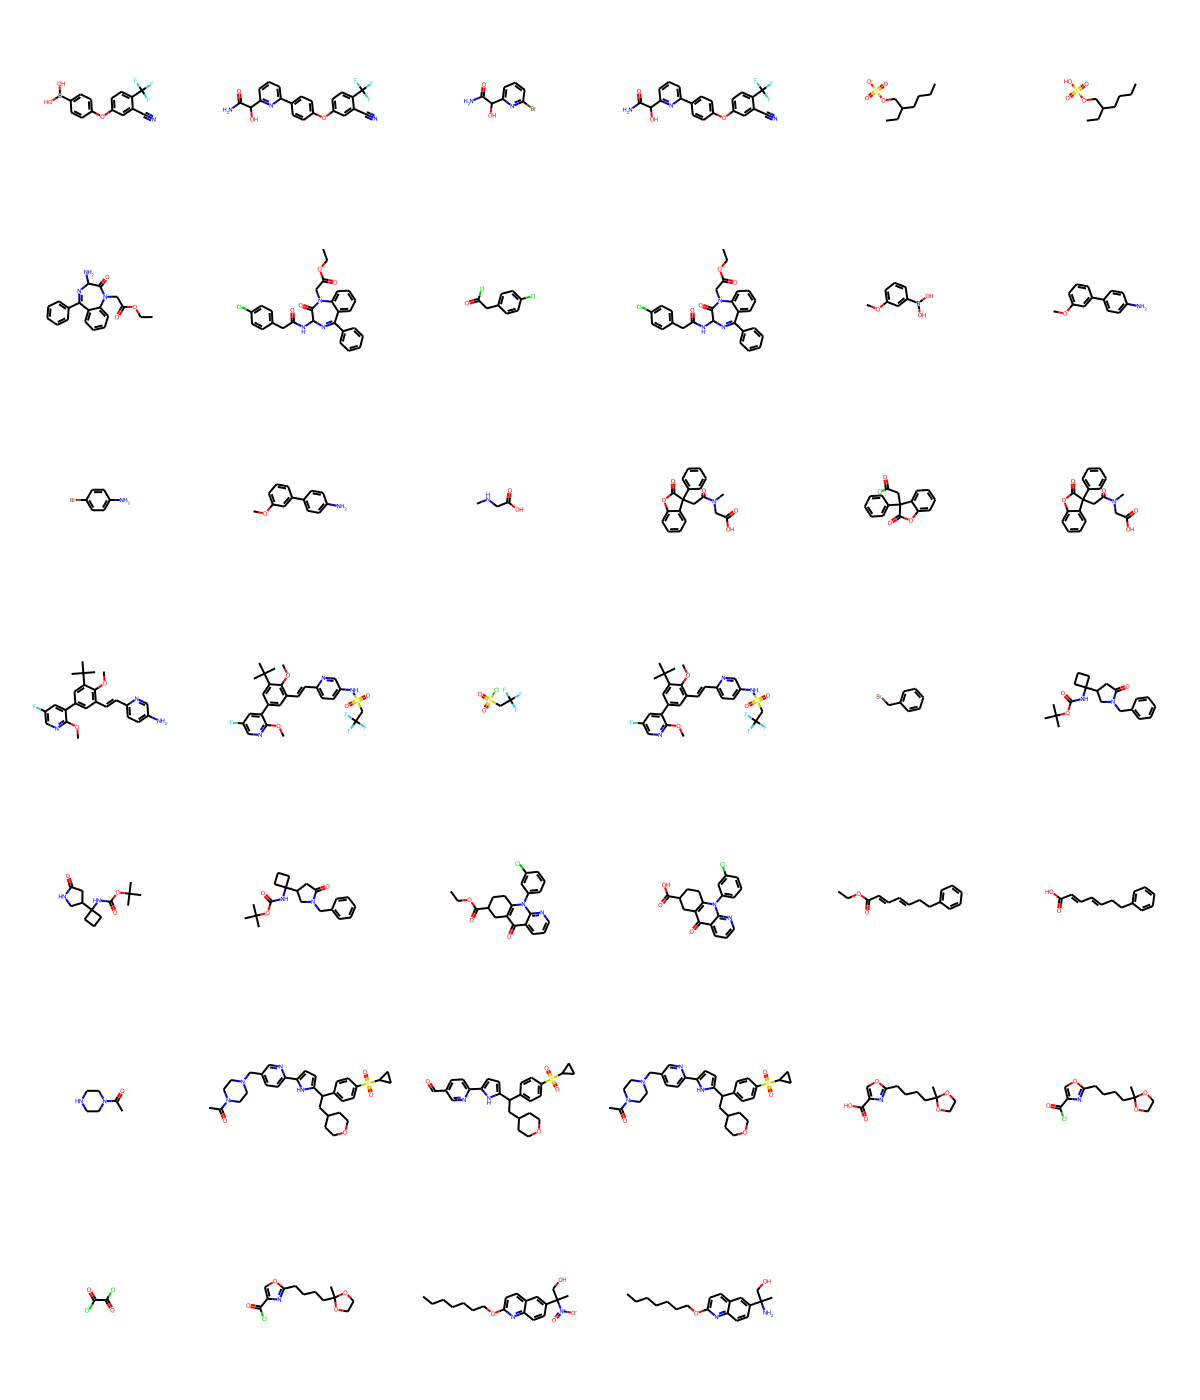

In [55]:
# display some mols of reactants and products
# so that reactant and product are next to each other
mols = []
for i in range(20):
    mols.append(Chem.MolFromSmiles(df_uspto_filtered2.iloc[i]['reactant']))
    mols.append(Chem.MolFromSmiles(df_uspto_filtered2.iloc[i]['product']))
Chem.Draw.MolsToGridImage(mols, molsPerRow=6, subImgSize=(200,200))

In [56]:
# create a list of of (reactant, product) tuples
reac_prod = list(zip(df_uspto_filtered2['reactant'], df_uspto_filtered2['product']))

In [57]:
digraph = nx.DiGraph()
digraph.add_edges_from(reac_prod)

In [58]:
# get random rows from dataframe and extract reactant and product
n_max = 1000
subgraph_smiles = []
for i, row in df_uspto_filtered2.sample(n_max).iterrows():
    subgraph_smiles.append(row['reactant'])
    subgraph_smiles.append(row['product'])
G = digraph.subgraph(subgraph_smiles)
plot_graph(G)

### Remove cycles

In [59]:
from remove_cycle_edges_by_dfs import dfs_remove_back_edges

edges_to_remove = dfs_remove_back_edges(digraph)

number of nodes to start dfs: 414103
number of back edges: 3275


In [60]:
# remove edges and lonely nodes
digraph.remove_edges_from(edges_to_remove)
digraph.remove_nodes_from([node for node in digraph.nodes if digraph.degree(node) == 0])

In [61]:
# remove edges_to_remove from uspto_data_split_fil
df_uspto_filtered2_lin = df_uspto_filtered2[~df_uspto_filtered2.set_index(['reactant', 'product']).index.isin(edges_to_remove)]
len(df_uspto_filtered2_lin), len(df_uspto_filtered2)

(1582410, 1585685)

In [62]:
nx.find_cycle(digraph, orientation="original")

KeyboardInterrupt: 

In [63]:
# save intermediate
df_uspto_filtered2_lin.to_csv(os.path.join(DATA_PATH, 'raw_uspto', dataset_name, 'uspto_split_combo_fil_deloop.csv'))

In [64]:
nx.dag_longest_path_length(digraph)

379

/Users/neeser/anaconda3/envs/intuitive-sc/lib/python3.10/site-packages/rdkit/Chem/Draw/IPythonConsole.py:252: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



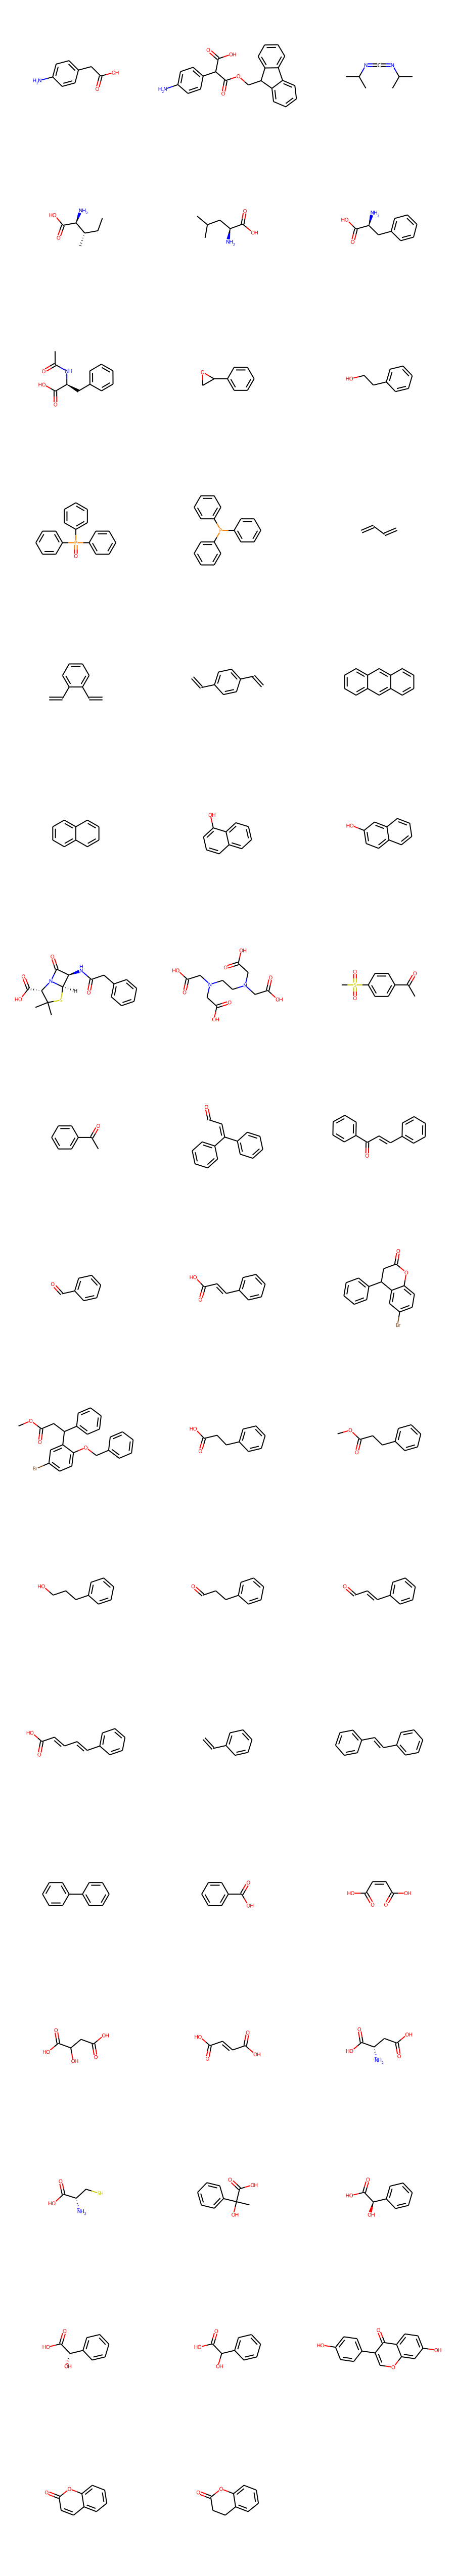

In [65]:
longest_graph = nx.dag_longest_path(digraph)
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in longest_graph], subImgSize=(300, 300))

### Final graph analysis

In [66]:
# get some stats on digraph
print(nx.info(digraph))
# 3 highest degree
print(sorted(digraph.degree, key=lambda x: x[1], reverse=True)[:3])
# get the longest path
nx.dag_longest_path_length(digraph)

/var/folders/_v/k2vy8xyx0d52x5tz3tnvwbdm0000gq/T/ipykernel_99942/1423649543.py:2: DeprecationWarning:

info is deprecated and will be removed in version 3.0.




DiGraph with 1159163 nodes and 1582410 edges
[('CN(C)C=O', 8047), ('O=C([O-])[O-]', 8037), ('C1CCOC1', 6856)]


379

In [67]:
# count number of nodes with degree 1
len([node for node in digraph.nodes if digraph.degree(node) == 1]), len([node for node in digraph.nodes if digraph.out_degree(node) == 1]), len([node for node in digraph.nodes if digraph.in_degree(node) == 1])

(379241, 472753, 268629)

## CJHIF
Academic reaction data from high-impact journals. Dataset assembled by https://ieeexplore.ieee.org/document/9440947/footnotes#footnotes-id-fn7

figshare: https://figshare.com/articles/dataset/original_data_zip/14647095

In [40]:
cjhif = pd.read_table('/Users/neeser/code/intuitive-sc/data/raw/cjhif/data_from_CJHIF_utf8', header=None, sep="\§",names=['rxn_smiles', 'mapped_rxn_smiles','reagents1', 'reagents2','solvent','catalyst','yield'])
cjhif.head()

/var/folders/_v/k2vy8xyx0d52x5tz3tnvwbdm0000gq/T/ipykernel_80563/2501854689.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  cjhif = pd.read_table('/Users/neeser/code/intuitive-sc/data/raw/cjhif/data_from_CJHIF_utf8', header=None, sep="\§",names=['rxn_smiles', 'mapped_rxn_smiles','reagents1', 'reagents2','solvent','catalyst','yield'])


rxn_smiles   
0          O=S1(=O)C=Cc2ccccc12>>O=S1(=O)CCc2ccccc12  \
1          O=S1(=O)C=Cc2ccccc12>>O=S1(=O)CCc2ccccc12   
2          O=S1(=O)C=Cc2ccccc12>>O=S1(=O)CCc2ccccc12   
3    O=C1CCCN1C1CCN(Cc2ccccc2)CC1>>O=C1CCCN1C1CCNCC1   
4  CC(C)(C)OC(=O)N1CC2CC(CN(Cc3ccccc3)C2)C1>>CC(C...   

                                   mapped_rxn_smiles         reagents1   
0  [CH3:6]\[CH:5]=[CH:4]/[S:2]([CH3:11])(=[O:1])=...               NaN  \
1  [CH3:6]\[CH:5]=[CH:4]/[S:2]([CH3:11])(=[O:1])=...               NaN   
2  [CH3:6]\[CH:5]=[CH:4]/[S:2]([CH3:11])(=[O:1])=...               NaN   
3  [CH3:2][N:4]([CH3:12])[CH2:5][c:6]1[cH:7][cH:8...          CN;NC=O;   
4  [CH3:2][N:4]([CH3:12])[CH2:5][c:6]1[cH:7][cH:8...  CN;NC=O;NC(O)=O;   

                                           reagents2   solvent   
0                                           hydrogen   ethanol  \
1                              sodium hydroxide|zinc       NaN   
2            palladium on activated charcoal|ethanol       NaN   
3  palladium 10 on activated carbon|ammonium formate  methanol   
4                                           hydrogen   ethanol   

                          catalyst  yield  
0  palladium on activated charcoal  100.0  
1                              NaN    0.0  
2                              NaN    0.0  
3                              NaN  100.0  
4  palladium on activated charcoal   51.0

In [41]:
# split into reactants and products
df_cjhif = pd.DataFrame()
df_cjhif['reactant'] = cjhif['rxn_smiles'].apply(lambda x: x.split('>>')[0])
df_cjhif['product'] = cjhif['rxn_smiles'].apply(lambda x: x.split('>>')[1])
len(df_cjhif)

3219165

In [42]:
# drop duplicates
df_cjhif.drop_duplicates(keep ='first', inplace=True)
len(df_cjhif)

2866963

### Split into individual reactants

In [43]:
# split datapoints in several points if there are multiple reactants
df_cjhif_split = []
for i, row in df_cjhif.iterrows():
    if '.' in row['reactant']:
        reactants = row['reactant'].split('.')
        for reactant in reactants:
            sub_df = pd.DataFrame({'reactant': reactant, 'product': row['product']}, index=[i])
            df_cjhif_split.append(sub_df)
    else:
        sub_df = pd.DataFrame({'reactant': row['reactant'], 'product': row['product']}, index=[i])
        df_cjhif_split.append(sub_df)
df_cjhif_split = pd.concat(df_cjhif_split)
df_cjhif_split.head()

reactant                        product
0                      O=S1(=O)C=Cc2ccccc12            O=S1(=O)CCc2ccccc12
3              O=C1CCCN1C1CCN(Cc2ccccc2)CC1              O=C1CCCN1C1CCNCC1
4  CC(C)(C)OC(=O)N1CC2CC(CN(Cc3ccccc3)C2)C1  CC(C)(C)OC(=O)N1CC2CNCC(C2)C1
8            CCNC1(CCN(Cc2ccccc2)CC1)C(N)=O            CCNC1(CCNCC1)C(N)=O
9                  C[C@H](OC(C)=O)C#CC(O)=O     C[C@H](OC(C)=O)\C=C/C(O)=O

In [45]:
# check if there are datapoints with multiple products
df_cjhif_split[df_cjhif_split['product'].str.contains('.', regex=False)]

reactant   
109                          CCOC(=O)C1CN(Cc2ccccc2)CCC1=O  \
373      COC(=O)[C@H]1[C@@H]2C[C@@H]3CC[C@@]1(C)[N+]3(C)O2   
373                                         CS([O-])(=O)=O   
5287                                      ClCc1ccc(C=C)cc1   
5287                                              Cn1ccnc1   
...                                                    ...   
3219104  O=S(c1ccc(cc1N(=O)=O)N(=O)=O)c1ccc(cc1N(=O)=O)...   
3219150                      c1ccc(cc1)P(c1ccccc1)c1ccccc1   
3219150  COc1ccc(c(CCc2ccc(Oc3cc(ccc3OC)C3OCCO3)cc2)c1)...   
3219156          CC1(C)[C@@H]2CC[C@@]1(C)C(=O)[C@H]2[Se]Br   
3219156               COC(=O)[C@H](N=CC(C)(C)CC=C)c1ccccc1   

                                                   product  
109                                  CCOC(=O)C1CNCCC1=O.Cl  
373      COC(=O)[C@H]1[C@@H](O)C[C@@H]2CC[C@@]1(C)N2C.C...  
373      COC(=O)[C@H]1[C@@H](O)C[C@@H]2CC[C@@]1(C)N2C.C...  
5287                     [Cl-].Cn1cc[n+](Cc2ccc(C=C)cc2)c1  
5287                     [Cl-].Cn1cc[n+](Cc2ccc(C=C)cc2)c1  
...                                                    ...  
3219104  [K+].CC(=O)CC1[C-](C(=CC=C1N(=O)=O)S(=O)c1ccc(...  
3219150  [Br-].COc1ccc(c(CCc2ccc(Oc3cc(C=O)ccc3OC)cc2)c...  
3219150  [Br-].COc1ccc(c(CCc2ccc(Oc3cc(C=O)ccc3OC)cc2)c...  
3219156  [Br-].COC(=O)[C@@H](c1ccccc1)[N+]1=CC(C)(C)CC1...  
3219156  [Br-].COC(=O)[C@@H](c1ccccc1)[N+]1=CC(C)(C)CC1...  

[230242 rows x 2 columns]

In [46]:
# drop rows with multiple products
df_cjhif_split = df_cjhif_split[~df_cjhif_split['product'].str.contains('.', regex=False)]

### Pre-cleaning

In [47]:
print('all unfiltered reactions: ', len(df_cjhif_split))    
# remove rows with nan values
df_cjhif_split = df_cjhif_split.dropna()
print('after removing nan values: ', len(df_cjhif_split))
# remove rows with empty strings
df_cjhif_split = df_cjhif_split[df_cjhif_split['reactant'] != '']
df_cjhif_split = df_cjhif_split[df_cjhif_split['product'] != '']
print('after removing empty strings: ', len(df_cjhif_split))
# remove rows with reactant and product that are the same
df_cjhif_split = df_cjhif_split[df_cjhif_split['reactant'] != df_cjhif_split['product']]
print('after removing reactant and product that are the same: ', len(df_cjhif_split))
# remove duplicates
df_cjhif_split = df_cjhif_split.drop_duplicates(keep='first')
print('after removing duplicates: ', len(df_cjhif_split))

all unfiltered reactions:  4228922
after removing nan values:  4228922
after removing empty strings:  4228922
after removing reactant and product that are the same:  4228913
after removing duplicates:  4085517


In [48]:
# save csv
df_cjhif_split.to_csv('/Users/neeser/code/intuitive-sc/data/raw/cjhif/cjhif_raw_preproc.csv')

In [49]:
df_cjhif_split = pd.read_csv('/Users/neeser/code/intuitive-sc/data/raw/cjhif/cjhif_raw_preproc.csv', index_col=0)
# reset index
df_cjhif_split.reset_index(drop=True, inplace=True)

In [51]:
import sys
sys.path.append('/Users/neeser/code/general_utils')
from parallel import chunked_parallel

# get list of tuples of reactant and product smiles
smiles_list = list(zip(df_cjhif_split['reactant'].tolist(), df_cjhif_split['product'].tolist()))

# filter smiles
smiles_list_filtered = chunked_parallel(smiles_list, filter_process)

101it [03:45,  2.23s/it]                        


In [52]:
# make df from filtered smiles
df_cjhif_filtered = pd.DataFrame(smiles_list_filtered, columns=['reactant', 'product'])

In [53]:
print('all unfiltered reactions: ', len(df_cjhif_filtered))    
# remove rows with nan values
df_cjhif_filtered = df_cjhif_filtered.dropna()
print('after removing nan values: ', len(df_cjhif_filtered))
# remove rows with empty strings
df_cjhif_filtered = df_cjhif_filtered[df_cjhif_filtered['reactant'] != '']
df_cjhif_filtered = df_cjhif_filtered[df_cjhif_filtered['product'] != '']
print('after removing empty strings: ', len(df_cjhif_filtered))
# remove rows with reactant and product that are the same
df_cjhif_filtered = df_cjhif_filtered[df_cjhif_filtered['reactant'] != df_cjhif_filtered['product']]
print('after removing reactant and product that are the same: ', len(df_cjhif_filtered))
# remove duplicates
df_cjhif_filtered = df_cjhif_filtered.drop_duplicates(keep='first')
print('after removing duplicates: ', len(df_cjhif_filtered))

all unfiltered reactions:  4085517
after removing nan values:  3973807
after removing empty strings:  3973807
after removing reactant and product that are the same:  3973805
after removing duplicates:  3973270


### Remove unwanted elements

In [54]:
accepted_elems = ['Se',
 'B',
 'I',
 'P',
 'F',
 'H',
 'C',
 'Br',
 'N',
 'O',
 'S',
 'Si',
 'Cl']

In [55]:
def remove_unwanted_elems(both_smiles):
    reac_smi = both_smiles[0]
    prod_smi = both_smiles[1]
    reactant = Chem.MolFromSmiles(reac_smi)
    product = Chem.MolFromSmiles(prod_smi)
    if reactant is None or product is None:
        return (None, None)
    reactant_elements = [atom.GetSymbol() for atom in reactant.GetAtoms()]
    product_elements = [atom.GetSymbol() for atom in product.GetAtoms()]

    # drop if reactant or product contains elements not in accepted_elems
    if not set(reactant_elements).issubset(set(accepted_elems)) or not set(product_elements).issubset(set(accepted_elems)):
        return (None, None)
    else:
        return (reac_smi, prod_smi)

In [56]:
# get list of tuples of reactant and product smiles
smiles_list = list(zip(df_cjhif_filtered['reactant'].tolist(), df_cjhif_filtered['product'].tolist()))

# filter smiles
smiles_list_filtered = chunked_parallel(smiles_list, remove_unwanted_elems)

# make df from filtered smiles
df_cjhif_filtered2 = pd.DataFrame(smiles_list_filtered, columns=['reactant', 'product'])

101it [07:08,  4.24s/it]                         


In [57]:
# drop rows with None
df_cjhif_filtered2 = df_cjhif_filtered2.dropna()
df_cjhif_filtered2.head()

reactant                        product
0                      O=S1(=O)C=Cc2ccccc21            O=S1(=O)CCc2ccccc21
1              O=C1CCCN1C1CCN(Cc2ccccc2)CC1              O=C1CCCN1C1CCNCC1
2  CC(C)(C)OC(=O)N1CC2CC(CN(Cc3ccccc3)C2)C1  CC(C)(C)OC(=O)N1CC2CNCC(C2)C1
3            CCNC1(C(N)=O)CCN(Cc2ccccc2)CC1            CCNC1(C(N)=O)CCNCC1
4                 CC(=O)O[C@@H](C)C#CC(=O)O    CC(=O)O[C@@H](C)/C=C\C(=O)O

In [58]:
len(df_cjhif_filtered2)

3863511

In [59]:
# save intermediate
df_cjhif_filtered2.to_csv('/Users/neeser/code/intuitive-sc/data/raw/cjhif/cjhif_raw_preproc2.csv')

### Prelim analysis

In [60]:
df_cjhif_filtered2 = pd.read_csv('/Users/neeser/code/intuitive-sc/data/raw/cjhif/cjhif_raw_preproc2.csv', index_col=0)

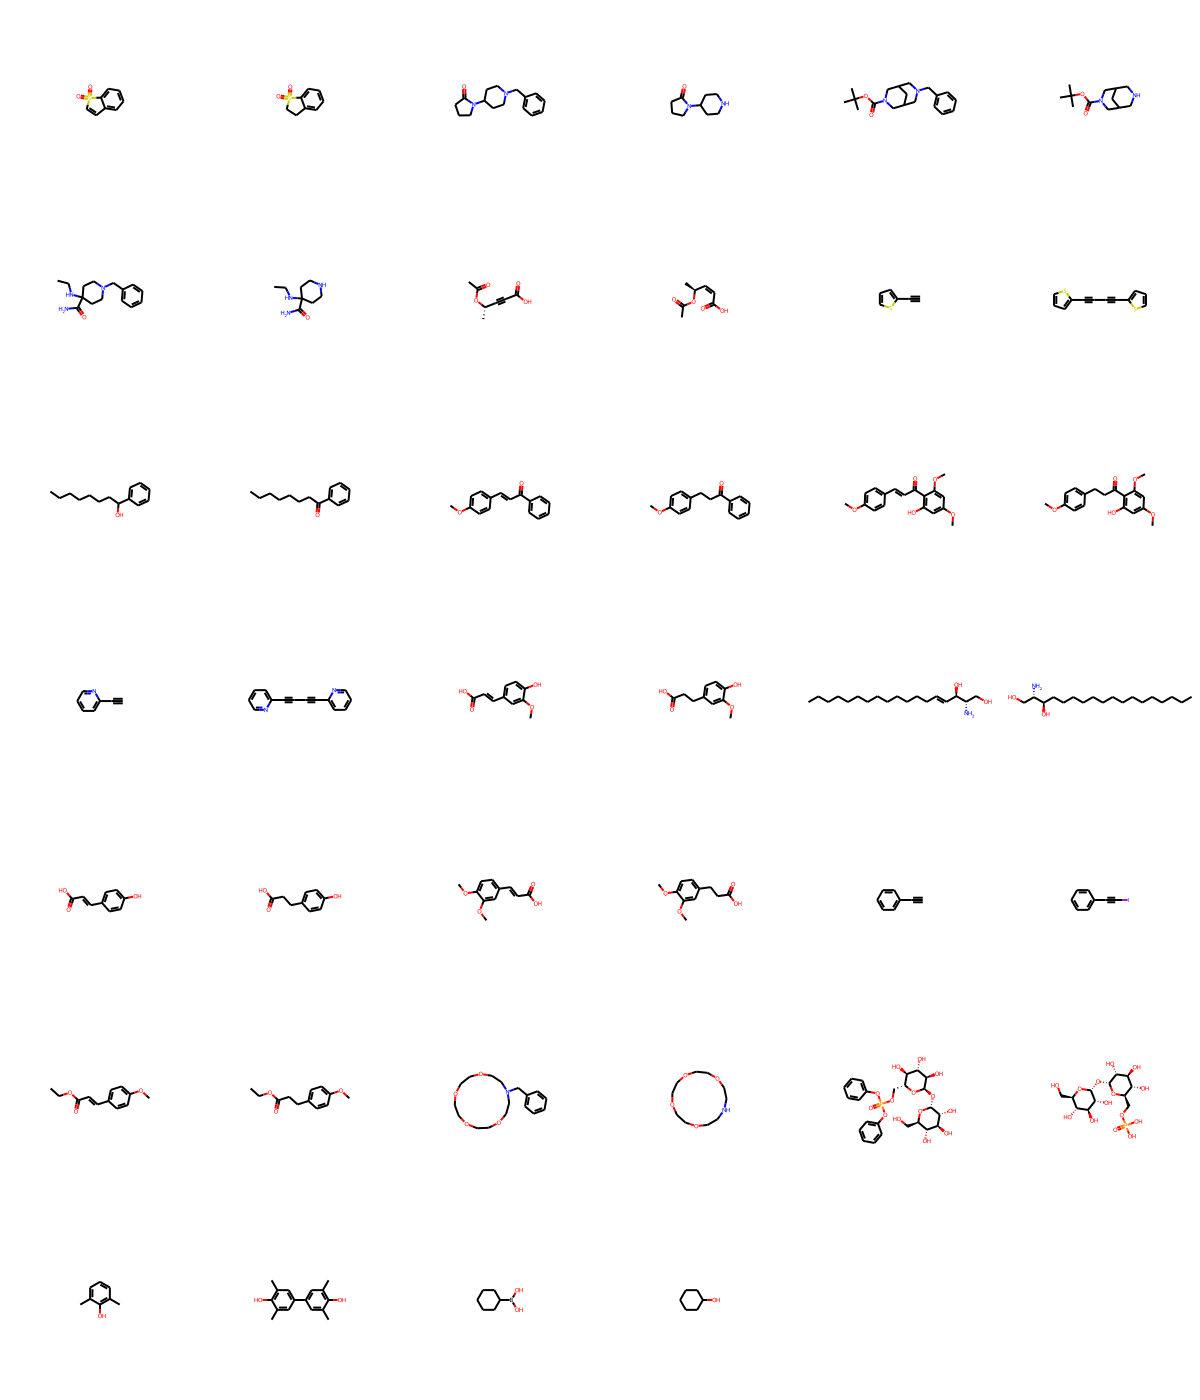

In [61]:
# display some mols of reactants and products
# so that reactant and product are next to each other
mols = []
for i in range(20):
    mols.append(Chem.MolFromSmiles(df_cjhif_filtered2.iloc[i]['reactant']))
    mols.append(Chem.MolFromSmiles(df_cjhif_filtered2.iloc[i]['product']))
Chem.Draw.MolsToGridImage(mols, molsPerRow=6, subImgSize=(200,200))

In [62]:
# create a list of of (reactant, product) tuples
reac_prod = list(zip(df_cjhif_filtered2['reactant'], df_cjhif_filtered2['product']))

In [63]:
digraph = nx.DiGraph()
digraph.add_edges_from(reac_prod)

In [64]:
# get random rows from dataframe and extract reactant and product
n_max = 1000
subgraph_smiles = []
for i, row in df_cjhif_filtered2.sample(n_max).iterrows():
    subgraph_smiles.append(row['reactant'])
    subgraph_smiles.append(row['product'])
G = digraph.subgraph(subgraph_smiles)
plot_graph(G)

### Remove cycles

In [65]:
from remove_cycle_edges_by_dfs import dfs_remove_back_edges

edges_to_remove = dfs_remove_back_edges(digraph)

number of nodes to start dfs: 628170
number of back edges: 25005


In [66]:
# remove edges and lonely nodes
digraph.remove_edges_from(edges_to_remove)
digraph.remove_nodes_from([node for node in digraph.nodes if digraph.degree(node) == 0])

In [67]:
# remove edges_to_remove from uspto_data_split_fil
df_cjhif_filtered2_lin = df_cjhif_filtered2[~df_cjhif_filtered2.set_index(['reactant', 'product']).index.isin(edges_to_remove)]
len(df_cjhif_filtered2_lin), len(df_cjhif_filtered2)

(3838506, 3863511)

In [68]:
df_cjhif_filtered2_lin.head()

reactant                        product
0                      O=S1(=O)C=Cc2ccccc21            O=S1(=O)CCc2ccccc21
1              O=C1CCCN1C1CCN(Cc2ccccc2)CC1              O=C1CCCN1C1CCNCC1
2  CC(C)(C)OC(=O)N1CC2CC(CN(Cc3ccccc3)C2)C1  CC(C)(C)OC(=O)N1CC2CNCC(C2)C1
3            CCNC1(C(N)=O)CCN(Cc2ccccc2)CC1            CCNC1(C(N)=O)CCNCC1
4                 CC(=O)O[C@@H](C)C#CC(=O)O    CC(=O)O[C@@H](C)/C=C\C(=O)O

In [69]:
# save intermediate
df_cjhif_filtered2_lin.to_csv('/Users/neeser/code/intuitive-sc/data/raw/cjhif/cjhif_preproc3_deloop.csv')

In [70]:
nx.dag_longest_path_length(digraph)

3128

/Users/neeser/anaconda3/envs/intuitive-sc/lib/python3.10/site-packages/rdkit/Chem/Draw/IPythonConsole.py:252: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



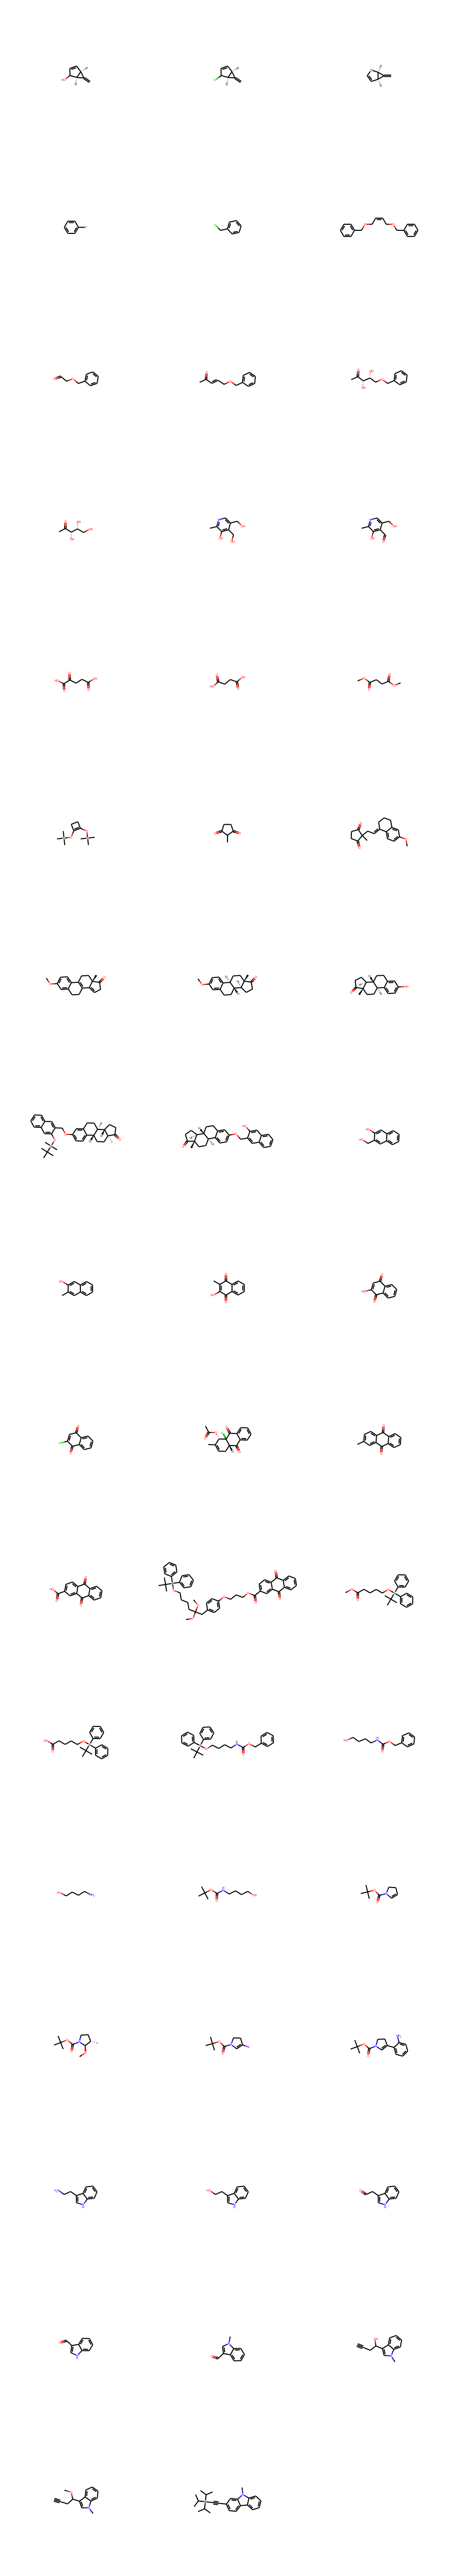

In [71]:
longest_graph = nx.dag_longest_path(digraph)
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in longest_graph], subImgSize=(300, 300))

## Combine datasets

In [68]:
df_uspto = pd.read_csv('/Users/neeser/code/intuitive-sc/data/raw_uspto/USPTO_full/uspto_split_combo_fil_deloop.csv', usecols=['reactant', 'product'])
df_uspto.head()

reactant   
0       N#Cc1cc(Oc2ccc(B(O)O)cc2)ccc1C(F)(F)F  \
1                      NC(=O)C(O)c1cccc(Br)n1   
2                    CCCCC(CC)COS(=O)(=O)[O-]   
3  CCOC(=O)CN1C(=O)C(N)N=C(c2ccccc2)c2ccccc21   
4                        O=C(Cl)Cc1ccc(Cl)cc1   

                                             product  
0  N#Cc1cc(Oc2ccc(-c3cccc(C(O)C(N)=O)n3)cc2)ccc1C...  
1  N#Cc1cc(Oc2ccc(-c3cccc(C(O)C(N)=O)n3)cc2)ccc1C...  
2                              CCCCC(CC)COS(=O)(=O)O  
3  CCOC(=O)CN1C(=O)C(NC(=O)Cc2ccc(Cl)cc2)N=C(c2cc...  
4  CCOC(=O)CN1C(=O)C(NC(=O)Cc2ccc(Cl)cc2)N=C(c2cc...

In [71]:
df_cjhif = pd.read_csv('/Users/neeser/code/intuitive-sc/data/raw/cjhif/cjhif_preproc3_deloop.csv', usecols=['reactant', 'product'])
df_cjhif.head()

reactant                        product
0                      O=S1(=O)C=Cc2ccccc21            O=S1(=O)CCc2ccccc21
1              O=C1CCCN1C1CCN(Cc2ccccc2)CC1              O=C1CCCN1C1CCNCC1
2  CC(C)(C)OC(=O)N1CC2CC(CN(Cc3ccccc3)C2)C1  CC(C)(C)OC(=O)N1CC2CNCC(C2)C1
3            CCNC1(C(N)=O)CCN(Cc2ccccc2)CC1            CCNC1(C(N)=O)CCNCC1
4                 CC(=O)O[C@@H](C)C#CC(=O)O    CC(=O)O[C@@H](C)/C=C\C(=O)O

In [72]:
# combine uspto and cjhif and add origin column
df_uspto['origin'] = 'uspto'
df_cjhif['origin'] = 'cjhif'
df_combined = pd.concat([df_uspto, df_cjhif], ignore_index=True)
df_combined.head()

reactant   
0       N#Cc1cc(Oc2ccc(B(O)O)cc2)ccc1C(F)(F)F  \
1                      NC(=O)C(O)c1cccc(Br)n1   
2                    CCCCC(CC)COS(=O)(=O)[O-]   
3  CCOC(=O)CN1C(=O)C(N)N=C(c2ccccc2)c2ccccc21   
4                        O=C(Cl)Cc1ccc(Cl)cc1   

                                             product origin  
0  N#Cc1cc(Oc2ccc(-c3cccc(C(O)C(N)=O)n3)cc2)ccc1C...  uspto  
1  N#Cc1cc(Oc2ccc(-c3cccc(C(O)C(N)=O)n3)cc2)ccc1C...  uspto  
2                              CCCCC(CC)COS(=O)(=O)O  uspto  
3  CCOC(=O)CN1C(=O)C(NC(=O)Cc2ccc(Cl)cc2)N=C(c2cc...  uspto  
4  CCOC(=O)CN1C(=O)C(NC(=O)Cc2ccc(Cl)cc2)N=C(c2cc...  uspto

In [73]:
# deduplicate
print('before deduplication: ', len(df_combined))
df_combined = df_combined.drop_duplicates(keep='first', subset=['reactant', 'product'])
print('after deduplication: ', len(df_combined))

before deduplication:  5420916
after deduplication:  5350307


### Remove cycles

In [74]:
reac_prod = list(zip(df_combined['reactant'], df_combined['product']))
combo_digraph = nx.DiGraph()
combo_digraph.add_edges_from(reac_prod)

In [75]:
edges_to_remove = dfs_remove_back_edges(combo_digraph)
# remove edges and lonely nodes
combo_digraph.remove_edges_from(edges_to_remove)
combo_digraph.remove_nodes_from([node for node in combo_digraph.nodes if combo_digraph.degree(node) == 0])

number of nodes to start dfs: 896002
number of back edges: 9603


In [76]:
# remove edges_to_remove from uspto_data_split_fil
df_combined_lin = df_combined[~df_combined.set_index(['reactant', 'product']).index.isin(edges_to_remove)]
len(df_combined_lin), len(df_combined)

(5340704, 5350307)

In [77]:
df_combined_lin[df_combined_lin['product'].str.contains('.', regex=False)]

Empty DataFrame
Columns: [reactant, product, origin]
Index: []

### Analyse combined set

In [78]:
# plot subgraph
n_max = 1000
subgraph_smiles = []
for i, row in df_combined.sample(n_max).iterrows():
    subgraph_smiles.append(row['reactant'])
    subgraph_smiles.append(row['product'])
G = combo_digraph.subgraph(subgraph_smiles)
plot_graph(G)

In [79]:
# get some stats on combo_digraph
print(nx.info(combo_digraph))
# 3 highest degree
print(sorted(combo_digraph.degree, key=lambda x: x[1], reverse=True)[:3])
# get the longest path
nx.dag_longest_path_length(combo_digraph)

/var/folders/_v/k2vy8xyx0d52x5tz3tnvwbdm0000gq/T/ipykernel_99942/1761935119.py:2: DeprecationWarning:

info is deprecated and will be removed in version 3.0.




DiGraph with 3798740 nodes and 5340704 edges
[('CC(=O)OC(C)=O', 35121), ('O=Cc1ccccc1', 14206), ('BrCc1ccccc1', 13462)]


3512

In [80]:
# count number of nodes with degree 1
len([node for node in combo_digraph.nodes if combo_digraph.degree(node) == 1]), len([node for node in combo_digraph.nodes if combo_digraph.out_degree(node) == 1]), len([node for node in combo_digraph.nodes if combo_digraph.in_degree(node) == 1])

(1244970, 1576322, 1331757)

In [81]:
# save df_combined_lin
df_combined_lin.to_csv('/Users/neeser/code/intuitive-sc/data/combo/uspto_cjhif_combo.csv', index=False)

## Input format
* randomize position of reactants and products
* add label/target column
* columns
    * smiles_i
    * smiles_j
    * target (what is more complex)
* make splits for hold-out test set

In [82]:
df_combined_lin = pd.read_csv('/Users/neeser/code/intuitive-sc/data/combo/uspto_cjhif_combo.csv')

In [83]:
reac_prod = list(zip(df_combined_lin['reactant'], df_combined_lin['product']))
combo_digraph = nx.DiGraph()
combo_digraph.add_edges_from(reac_prod)

In [84]:
# number of connected components (subgraphs with no edges between them)
# cannot make use of this because one huge component and then many small ones only summing up to roughly 6%
nx.number_weakly_connected_components(combo_digraph)

223074

In [85]:
def wcc_train_test_split(graph, test_size: int = None, test_ratio: float = 0.2, max_iterations=100):
    '''
    Splits a directed graph into train and test subgraphs base on the number of edges, while minimizing the nodes that need to be removed so that no nodes are shared between the two subgraphs.
    For the use here one weakly connected component is split but also several components could be split but the keeping all components intact in one subset is not guaranteed.
    '''
    # Get all edges in the graph
    all_edges = list(graph.edges())

    # Calculate the number of edges to include in the test subgraph
    if test_size is None:
        num_test_edges = int(len(all_edges) * test_ratio)
    else:
        num_test_edges = test_size

    # Perform iterative splitting to minimize unconnected node removal
    best_train_graph = None
    best_test_graph = None
    min_unconnected_nodes = float('inf')

    for _ in tqdm(range(max_iterations), total=max_iterations):
        # Randomly select edges for the test subgraph
        test_edges = random.sample(all_edges, num_test_edges)

        # Create the test subgraph
        test_graph = nx.DiGraph()
        test_graph.add_edges_from(test_edges)
        test_nodes = list(test_graph.nodes())

        # Create the train subgraph
        train_graph = graph.copy()
        train_graph.remove_nodes_from(test_nodes)

        # Count the number of unconnected nodes in the train subgraph
        unconnected_nodes = [node for node in train_graph.nodes() if train_graph.degree(node) == 0]
        num_unconnected_nodes = len(unconnected_nodes)

        # Update the best split if the current split has fewer unconnected nodes
        if num_unconnected_nodes < min_unconnected_nodes:
            best_train_graph = train_graph
            best_test_graph = test_graph
            min_unconnected_nodes = num_unconnected_nodes
            print(f'New best split found with {num_unconnected_nodes} unconnected nodes')

        # Break the loop if no unconnected nodes remain
        if num_unconnected_nodes == 0:
            break

    return best_train_graph, best_test_graph


In [86]:
# function to grow from random edge to get maximally connected subgraph
# this will be done recursively  
def grow_from_random_edge(digraph, subgraph, focus_edge, n_max):
    # get edges from connected nodes
    connected_edges = []
    for node in focus_edge:
        new_edges = list(digraph.edges(node))
        if new_edges:
            connected_edges += new_edges
        else:
            # select new random focus edge if node has no edges
            new_focus_edge = random.choice(list(digraph.edges))
            grow_from_random_edge(digraph, subgraph, new_focus_edge, n_max)
    
    # remove edges that are already in subgraph
    connected_edges = [edge for edge in connected_edges if edge not in subgraph.edges]
    
    # add all edges that are not already in subgraph
    subgraph.add_edges_from(connected_edges)

    # start recursion if subgraph is not yet big enough
    print('subgraph size:', len(subgraph), 'n_max:', n_max)
    if len(subgraph) < n_max:
        for edge in connected_edges:
            # check if the subgraph has reached the desired size before recursion
            if len(subgraph) >= n_max:
                break
            grow_from_random_edge(digraph, subgraph, edge, n_max)
    
    # return the subgraph when the desired size is reached
    return subgraph


In [87]:
def find_border_edge(graph):
    for edge in graph.edges():
        node1, node2 = edge
        if len(list(graph.neighbors(node1))) < graph.degree(node1) or len(list(graph.neighbors(node2))) < graph.degree(node2):
            return edge
    return None

In [88]:
#  Get the weakly connected components of the graph
components = list(nx.weakly_connected_components(combo_digraph))

# Calculate the total number of edges in the graph
total_edges = len(combo_digraph.edges())

# Calculate the target number of test edges
target_test_edges = int(total_edges * 0.1)

# get the biggest component and initialize the test graph with the rest
biggest_component = max(components, key=len)
train_graph_init = combo_digraph.subgraph(biggest_component).copy()
test_graph_init = combo_digraph.copy()
test_graph_init.remove_nodes_from(biggest_component)

# Get the number of edges in the train and test graphs
num_train_edges = len(train_graph_init.edges())
num_test_edges = len(test_graph_init.edges())
# calculate how many are missing to get to target
missing_test_edges = target_test_edges - num_test_edges

# grow test graph from random edge until target is reached
# random_focus_edge = random.choice(list(train_graph_init.edges))
random_focus_edge = find_border_edge(train_graph_init)

focus_subgraph = nx.DiGraph()
focus_subgraph.add_edge(random_focus_edge[0], random_focus_edge[1])
test_graph_add = grow_from_random_edge(train_graph_init, focus_subgraph, random_focus_edge, missing_test_edges)

# add the additional test graph to the initial test graph
test_graph = nx.compose(test_graph_init, test_graph_add)

# Create the train graph
train_graph = combo_digraph.copy()
train_graph.remove_nodes_from(test_graph.nodes())

# Get the number of edges in the train and test graphs
num_train_edges = len(train_graph.edges())
num_test_edges = len(test_graph.edges())

# Print the number of edges in the train and test graphs
print("Number of edges in train graph:", num_train_edges)
print("Number of edges in test graph:", num_test_edges)
# get actual split ratio
print("Actual test ratio:", num_test_edges / (num_train_edges + num_test_edges))

subgraph size: 4087 n_max: 220095
subgraph size: 4817 n_max: 220095
subgraph size: 7378 n_max: 220095
subgraph size: 7429 n_max: 220095
subgraph size: 7430 n_max: 220095
subgraph size: 8102 n_max: 220095
subgraph size: 8104 n_max: 220095
subgraph size: 8105 n_max: 220095
subgraph size: 8109 n_max: 220095
subgraph size: 8110 n_max: 220095
subgraph size: 8111 n_max: 220095
subgraph size: 8112 n_max: 220095
subgraph size: 8115 n_max: 220095
subgraph size: 8115 n_max: 220095
subgraph size: 8119 n_max: 220095
subgraph size: 8120 n_max: 220095
subgraph size: 20220 n_max: 220095
subgraph size: 20267 n_max: 220095
subgraph size: 20273 n_max: 220095
subgraph size: 20274 n_max: 220095
subgraph size: 20276 n_max: 220095
subgraph size: 20277 n_max: 220095
subgraph size: 20278 n_max: 220095
subgraph size: 20279 n_max: 220095
subgraph size: 20282 n_max: 220095
subgraph size: 20282 n_max: 220095
subgraph size: 20285 n_max: 220095
subgraph size: 20285 n_max: 220095
subgraph size: 20286 n_max: 220095
s

In [89]:
# #  Get the weakly connected components of the graph
# components = list(nx.weakly_connected_components(combo_digraph))

# # Calculate the total number of edges in the graph
# total_edges = len(combo_digraph.edges())

# # Calculate the target number of test edges (approximately 20%)
# target_test_edges = int(total_edges * 0.1)

# # get the biggest component and initialize the test graph with the rest
# biggest_component = max(components, key=len)
# train_graph_init = combo_digraph.subgraph(biggest_component).copy()
# test_graph_init = combo_digraph.copy()
# test_graph_init.remove_nodes_from(biggest_component)

# # Get the number of edges in the train and test graphs
# num_train_edges = len(train_graph_init.edges())
# num_test_edges = len(test_graph_init.edges())
# # calculate how many are missing to get to target
# missing_test_edges = target_test_edges - num_test_edges

# # split the biggest component into train and test
# train_graph, test_graph_add = wcc_train_test_split(train_graph_init, test_size=missing_test_edges)

# # add the additional test graph to the initial test graph
# test_graph = nx.compose(test_graph_init, test_graph_add)

# # Get the number of edges in the train and test graphs
# num_train_edges = len(train_graph.edges())
# num_test_edges = len(test_graph.edges())

# # Print the number of edges in the train and test graphs
# print("Number of edges in train graph:", num_train_edges)
# print("Number of edges in test graph:", num_test_edges)
# # get actual split ratio
# print("Actual test ratio:", num_test_edges / (num_train_edges + num_test_edges))

In [90]:
# make sure that no nodes are shared between train and test
len(set(train_graph.nodes()).intersection(set(test_graph.nodes()))) == 0

True

In [91]:
# save train and test graphs
nx.write_edgelist(train_graph, '/Users/neeser/code/intuitive-sc/data/combo/uspto_cjhif_combo_train.edgelist')
nx.write_edgelist(test_graph, '/Users/neeser/code/intuitive-sc/data/combo/uspto_cjhif_combo_test.edgelist')

In [92]:
# split the df accordingly
test_edges = list(test_graph.edges())
train_edges = list(train_graph.edges())
df_train = df_combined_lin[df_combined_lin.set_index(['reactant', 'product']).index.isin(train_edges)]
df_test = df_combined_lin[df_combined_lin.set_index(['reactant', 'product']).index.isin(test_edges)]
# sanity checks
len(df_train), len(df_test), len(df_combined_lin) - (len(df_train) + len(df_test))

(3349455, 711550, 1279699)

In [93]:
# save train and test dfs
df_train.to_csv('/Users/neeser/code/intuitive-sc/data/combo/uspto_cjhif_combo_train.csv', index=False)
df_test.to_csv('/Users/neeser/code/intuitive-sc/data/combo/uspto_cjhif_combo_test.csv', index=False)

In [94]:
nx.number_weakly_connected_components(test_graph), nx.number_weakly_connected_components(train_graph)

(223320, 268447)

In [95]:
# check that thetwo subgraph do no share any nodes
set(df_train['reactant']).intersection(set(df_test['reactant'])), set(df_train['product']).intersection(set(df_test['product'])), set(df_train['reactant']).intersection(set(df_test['product'])), set(df_train['product']).intersection(set(df_test['reactant']))

(set(), set(), set(), set())

In [8]:
import sys
sys.path.append('/Users/neeser/code/general_utils')
from parallel import chunked_parallel

def smi2mol(smi):
    return Chem.MolFromSmiles(smi)

df_train['reactant_mol'] = chunked_parallel(df_train['reactant'], smi2mol)
df_train['product_mol'] = chunked_parallel(df_train['product'], smi2mol)

101it [00:53,  1.87it/s]                         
101it [02:09,  1.28s/it]                         


In [9]:
df_test['reactant_mol'] = chunked_parallel(df_test['reactant'], smi2mol)
df_test['product_mol'] = chunked_parallel(df_test['product'], smi2mol)

101it [00:11,  9.15it/s]                        
101it [00:13,  7.23it/s]                        


### Analyse the train and test sets

In [10]:
# get MW and heavy atom count
from rdkit.Chem import Descriptors
df_train['reactant_mw'] = df_train['reactant_mol'].apply(Descriptors.ExactMolWt)
df_train['reactant_hac'] = df_train['reactant_mol'].apply(lambda x: x.GetNumHeavyAtoms())
df_train['product_mw'] = df_train['product_mol'].apply(Descriptors.ExactMolWt)
df_train['product_hac'] = df_train['product_mol'].apply(lambda x: x.GetNumHeavyAtoms())
df_test['reactant_mw'] = df_test['reactant_mol'].apply(Descriptors.ExactMolWt)
df_test['reactant_hac'] = df_test['reactant_mol'].apply(lambda x: x.GetNumHeavyAtoms())
df_test['product_mw'] = df_test['product_mol'].apply(Descriptors.ExactMolWt)
df_test['product_hac'] = df_test['product_mol'].apply(lambda x: x.GetNumHeavyAtoms())

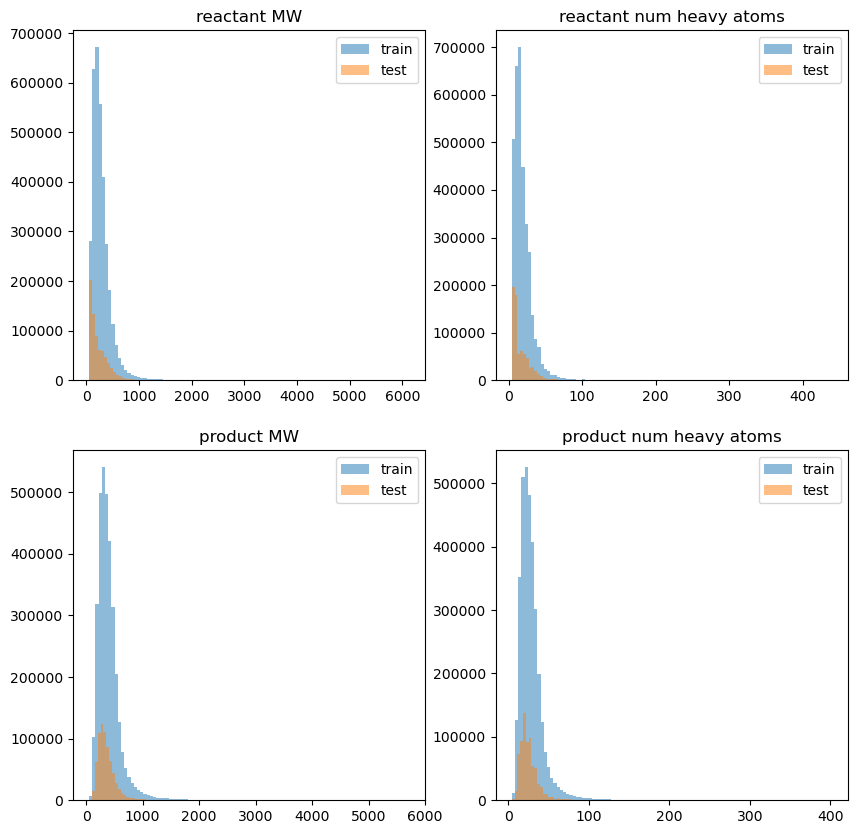

In [11]:
# plot histograms comparing df_train and df_test with plt.hist
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].hist(df_train['reactant_mw'], bins=100, alpha=0.5, label='train')
ax[0, 0].hist(df_test['reactant_mw'], bins=100, alpha=0.5, label='test')
ax[0, 0].set_title('reactant MW')
ax[0, 0].legend()
ax[0, 1].hist(df_train['reactant_hac'], bins=100, alpha=0.5, label='train')
ax[0, 1].hist(df_test['reactant_hac'], bins=100, alpha=0.5, label='test')
ax[0, 1].set_title('reactant num heavy atoms')
ax[0, 1].legend()
ax[1, 0].hist(df_train['product_mw'], bins=100, alpha=0.5, label='train')
ax[1, 0].hist(df_test['product_mw'], bins=100, alpha=0.5, label='test')
ax[1, 0].set_title('product MW')
ax[1, 0].legend()
ax[1, 1].hist(df_train['product_hac'], bins=100, alpha=0.5, label='train')
ax[1, 1].hist(df_test['product_hac'], bins=100, alpha=0.5, label='test')
ax[1, 1].set_title('product num heavy atoms')
ax[1, 1].legend()

In [12]:
# longest path analysis
# get the longest path in the train graph
longest_path_train = nx.dag_longest_path(train_graph)
# get the longest path in the test graph
longest_path_test = nx.dag_longest_path(test_graph)
len(longest_path_train), len(longest_path_test)

NameError: name 'train_graph' is not defined

### Randomize the position of reactants and products and get correct format

In [3]:
df_train = pd.read_csv('/Users/neeser/code/intuitive-sc/data/combo/uspto_cjhif_combo_train.csv')
df_test = pd.read_csv('/Users/neeser/code/intuitive-sc/data/combo/uspto_cjhif_combo_test.csv')

In [4]:
import random
random.seed(42)
# get random rows from dataframe and extract reactant and product
def format_rows(row):
    # randomize reactants and products
    if random.random() > 0.5:
        return row['reactant'], row['product'], 1
    else:
        return row['product'], row['reactant'], 0

In [5]:
df_train_reorder = pd.DataFrame([format_rows(row) for _, row in df_train.iterrows()], columns=['smiles_i', 'smiles_j', 'target'])

In [6]:
df_test_reorder = pd.DataFrame([format_rows(row) for _, row in df_test.iterrows()], columns=['smiles_i', 'smiles_j', 'target'])
df_test_reorder.head()

smiles_i   
0          N#Cc1cc(Oc2ccc(B(O)O)cc2)ccc1C(F)(F)F  \
1                          CCCCC(CC)COS(=O)(=O)O   
2  CC(C)(C)OC(=O)NC1(C2CC(=O)N(Cc3ccccc3)C2)CCC1   
3  O=C(O)C1CCc2c(c(=O)c3cccnc3n2-c2cccc(Cl)c2)C1   
4      CC(=O)C1CNC(C)=C2c3c(cnc4cc(Cl)ccc34)NC21   

                                            smiles_j  target  
0  N#Cc1cc(Oc2ccc(-c3cccc(C(O)C(N)=O)n3)cc2)ccc1C...       1  
1                           CCCCC(CC)COS(=O)(=O)[O-]       0  
2                                        BrCc1ccccc1       0  
3    CCOC(=O)C1CCc2c(c(=O)c3cccnc3n2-c2cccc(Cl)c2)C1       0  
4                  CC1=C2c3c(cnc4cc(Cl)ccc34)NC2CCN1       1

In [7]:
# save the reordered dfs
df_train_reorder.to_csv('/Users/neeser/code/intuitive-sc/data/combo/uspto_cjhif_combo_train_reorder.csv', index=False)
df_test_reorder.to_csv('/Users/neeser/code/intuitive-sc/data/combo/uspto_cjhif_combo_test_reorder.csv', index=False)

### Get similarity between pairs
Use for creating groups based on similarity intervals for curriculum learning.

In [3]:
df_train_reorder = pd.read_csv('/Users/neeser/code/intuitive-sc/data/combo/uspto_cjhif_combo_train_reorder.csv')
df_test_reorder = pd.read_csv('/Users/neeser/code/intuitive-sc/data/combo/uspto_cjhif_combo_test_reorder.csv')

In [4]:
# compute fingerprints for each molecule
from rdkit.Chem import AllChem
df_train_reorder['fp_i'] = df_train_reorder['smiles_i'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), 2, nBits=2048))
df_train_reorder['fp_j'] = df_train_reorder['smiles_j'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), 2, nBits=2048))
df_test_reorder['fp_i'] = df_test_reorder['smiles_i'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), 2, nBits=2048))
df_test_reorder['fp_j'] = df_test_reorder['smiles_j'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), 2, nBits=2048))

In [5]:
# get tanimoto similarity for all pairs
from rdkit.Chem import DataStructs

df_train_reorder['tanimoto'] = df_train_reorder.apply(lambda x: DataStructs.FingerprintSimilarity(x['fp_i'], x['fp_j']), axis=1)
df_test_reorder['tanimoto'] = df_test_reorder.apply(lambda x: DataStructs.FingerprintSimilarity(x['fp_i'], x['fp_j']), axis=1)

In [6]:
df_train_reorder.head()

smiles_i   
0         CCOC(=O)CN1C(=O)C(N)N=C(c2ccccc2)c2ccccc21  \
1                           COc1cccc(-c2ccc(N)cc2)c1   
2       CN(CC(=O)O)C(=O)CC1(c2ccccc2)C(=O)Oc2ccccc21   
3       CN(CC(=O)O)C(=O)CC1(c2ccccc2)C(=O)Oc2ccccc21   
4  COc1ncc(F)cc1-c1cc(/C=C/c2ccc(N)cn2)c(OC)c(C(C...   

                                            smiles_j  target   
0  CCOC(=O)CN1C(=O)C(NC(=O)Cc2ccc(Cl)cc2)N=C(c2cc...       1  \
1                                  COc1cccc(B(O)O)c1       0   
2                                          CNCC(=O)O       0   
3                O=C(Cl)CC1(c2ccccc2)C(=O)Oc2ccccc21       0   
4  COc1ncc(F)cc1-c1cc(/C=C/c2ccc(NS(=O)(=O)CC(F)(...       1   

                                                fp_i   
0  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  \
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                fp_j  tanimoto  
0  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.615385  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.411765  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.173913  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.622222  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.652174

In [10]:
# show those with tanimoto == 1
df_eq_tan = df_train_reorder[df_train_reorder['tanimoto'] == 1]
df_eq_tan

smiles_i   
675                           CC[C@@H]1SC2(CCN(C)CC2)NC1=O  \
1980     CCN1CC[C@@H](C(=O)NCc2cc(F)ccc2S(=O)(=O)Nc2ccc...   
2257           CC(=O)c1ccc(C(=O)OCCOCCOCCOCCO)c(O)c1C(C)=O   
2305                         CC(C)(C)OC(=O)N1CC[C@@H](F)C1   
2999     COc1cc([C@@H]2c3cc4c(cc3[C@H](O)[C@H]3COC(=O)[...   
...                                                    ...   
3336776               O=C(O)CCCCCCC1=C(O)C(=O)c2ccccc2C1=O   
3340735  CCCC[C@H](NC=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H...   
3344418  CCOC(=O)C(C)(C)CC(CC(CC(CC(Br)C(=O)OCCCn1cc(CO...   
3346958  CCCCCCCCCC(CCCCCCCCC)N1C(=O)c2ccc3c4ccc5c6c(cc...   
3348839                               O=C1Sc2ccc3ccccc3c21   

                                                  smiles_j  target   
675                            CC[C@H]1SC2(CCN(C)CC2)NC1=O       1  \
1980     CCN1CC[C@H](C(=O)NCc2cc(F)ccc2S(=O)(=O)Nc2ccc3...       0   
2257              CC(=O)c1ccc(C(=O)OCCOCCOCCO)c(O)c1C(C)=O       0   
2305                          CC(C)(C)OC(=O)N1CC[C@H](F)C1       0   
2999     COc1cc([C@@H]2c3cc4c(cc3[C@H](O)[C@H]3COC(=O)[...       0   
...                                                    ...     ...   
3336776              O=C(O)CCCCCCCC1=C(O)C(=O)c2ccccc2C1=O       0   
3340735  CCCC[C@H](NC=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H...       1   
3344418  CCOC(=O)C(C)(C)CC(CC(CC(CC(CC(CC(Br)C(=O)OCCCn...       1   
3346958  CCCCCCCCCC(CCCCCCCCC)N1C(=O)c2ccc3c4ccc5c6c(cc...       1   
3348839           O=C1Sc2ccc3ccccc3c2C(=O)Sc2ccc3ccccc3c21       1   

                                                      fp_i   
675      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  \
1980     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2257     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...   
2305     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2999     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                    ...   
3336776  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3340735  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...   
3344418  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...   
3346958  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3348839  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                      fp_j  tanimoto  
675      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1.0  
1980     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1.0  
2257     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...       1.0  
2305     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1.0  
2999     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1.0  
...                                                    ...       ...  
3336776  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1.0  
3340735  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...       1.0  
3344418  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...       1.0  
3346958  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1.0  
3348839  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1.0  

[1617 rows x 6 columns]

In [15]:
fp_i_test = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(df_train_reorder.iloc[675].smiles_i), 2, nBits=2048, useChirality=True)
fp_j_test = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(df_train_reorder.iloc[675].smiles_j), 2, nBits=2048, useChirality=True)
DataStructs.FingerprintSimilarity(fp_i_test,fp_j_test)

0.7222222222222222

In [11]:
# check if any of those have the same smiles in i and j
df_eq_tan[df_eq_tan['smiles_i'] == df_eq_tan['smiles_j']]

Empty DataFrame
Columns: [smiles_i, smiles_j, target, fp_i, fp_j, tanimoto]
Index: []

There are quite some stereo conversions that cannot be captured by these fingerprints.

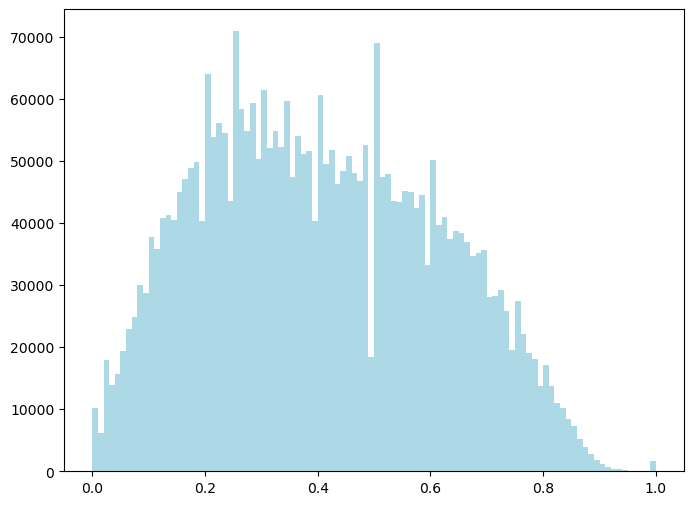

In [51]:
# plot distribution of tanimoto similarity scores

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_train_reorder['tanimoto'], bins=100, color='lightblue');

In [17]:
# order based on tanimoto and bin into 25 bins

df_train_reorder.sort_values(by=['tanimoto'], inplace=True)
df_train_reorder['tanimoto_bin'] = pd.qcut(df_train_reorder['tanimoto'], 25, labels=False)
df_train_reorder.head()

smiles_i   
1189871                                            O=CCCCI  \
2740370                                         C1CN1N1CC1   
2164818                      Cc1cc(C(=N)c2ccco2)c2n1CCCCC2   
820742                      FC(F)(F)c1cc(I)c(C(F)(F)F)cc1I   
2501558  COc1c2cc3ccccc3c1-c1c(OC)c(cc3ccccc13)CSCCCSCC...   

                       smiles_j  target   
1189871                 OC1CCC1       0  \
2740370                OCCNNCCO       1   
2164818                  C#CCBr       0   
820742   [O-][I+3]([O-])([O-])O       0   
2501558          SCCCSCCCCSCCCS       0   

                                                      fp_i   
1189871  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  \
2740370  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2164818  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
820742   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2501558  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                      fp_j  tanimoto   
1189871  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       0.0  \
2740370  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       0.0   
2164818  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       0.0   
820742   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       0.0   
2501558  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       0.0   

         tanimoto_bin  
1189871             0  
2740370             0  
2164818             0  
820742              0  
2501558             0

In [70]:
df_train_reorder.drop(['fp_i', 'fp_j'], axis=1, inplace=True)

In [71]:
# go to order based on index
df_train_reorder.sort_index(inplace=True)
df_train_reorder.head()

smiles_i   
0         CCOC(=O)CN1C(=O)C(N)N=C(c2ccccc2)c2ccccc21  \
1                           COc1cccc(-c2ccc(N)cc2)c1   
2       CN(CC(=O)O)C(=O)CC1(c2ccccc2)C(=O)Oc2ccccc21   
3       CN(CC(=O)O)C(=O)CC1(c2ccccc2)C(=O)Oc2ccccc21   
4  COc1ncc(F)cc1-c1cc(/C=C/c2ccc(N)cn2)c(OC)c(C(C...   

                                            smiles_j  target  tanimoto   
0  CCOC(=O)CN1C(=O)C(NC(=O)Cc2ccc(Cl)cc2)N=C(c2cc...       1  0.615385  \
1                                  COc1cccc(B(O)O)c1       0  0.411765   
2                                          CNCC(=O)O       0  0.173913   
3                O=C(Cl)CC1(c2ccccc2)C(=O)Oc2ccccc21       0  0.622222   
4  COc1ncc(F)cc1-c1cc(/C=C/c2ccc(NS(=O)(=O)CC(F)(...       1  0.652174   

   tanimoto_bin  
0            20  
1            13  
2             3  
3            20  
4            21

In [73]:
df_test_reorder.drop(['fp_i', 'fp_j'], axis=1, inplace=True)

In [74]:
# save both csv files
df_train_reorder.to_csv('/Users/neeser/code/intuitive-sc/data/combo/uspto_cjhif_combo_train_reorder.csv', index=False)
df_test_reorder.to_csv('/Users/neeser/code/intuitive-sc/data/combo/uspto_cjhif_combo_test_reorder.csv', index=False)